In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/FinancialPhraseBank-v1.0/Sentences_50Agree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/FinancialPhraseBank-v1.0/Sentences_66Agree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/FinancialPhraseBank-v1.0/Sentences_75Agree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/FinancialPhraseBank-v1.0/Sentences_AllAgree.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/FinancialPhraseBank-v1.0/License.txt
/kaggle/input/sentiment-analysis-for-financial-news/FinancialPhraseBank/FinancialPhraseBank-v1.0/README.txt


# Importing Necessary Libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier, LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


# Loading Data

In [3]:
data = pd.read_csv('/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv', encoding='latin-1', names=['sentiment', 'text'])
data.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


# Data Preprocessing

In [4]:
# making list stopwords for removing stopwords from our text 
stop = set(stopwords.words('english'))
stop.update(punctuation)
print(stop)

{"needn't", 'about', 'does', '~', 'am', 'shouldn', 'which', 'against', 'where', 'can', "didn't", ']', '^', "don't", 'until', 'to', 'all', 'wasn', ',', "hasn't", '>', 'this', 'm', 'who', "mightn't", 'his', 'should', 'was', 'him', 'on', 'hers', '?', 'above', "wasn't", 'ours', 'very', '#', 'out', 'and', 'an', "'", 'itself', 'down', 'are', 'won', '|', 'same', '[', 'himself', 'few', 'me', 'y', 'hasn', 'wouldn', "it's", "won't", 'only', 'ain', 'of', 'from', '$', '.', 'hadn', 'i', 'those', ';', "shouldn't", "isn't", '<', 'your', 'had', 'any', 'such', 'were', 'she', 's', 'her', 'a', 'ma', 'you', 'in', 'whom', 'some', 'ourselves', "you'd", '{', 'so', '/', 'then', "wouldn't", 'most', 'll', 'haven', 'did', ')', 'shan', 'up', 'after', 'more', 'myself', "you're", "hadn't", '\\', 'once', 'we', 'it', "shan't", ':', 're', 'further', 'other', 'now', "should've", 'at', 'they', 'the', 'themselves', "you'll", 'yourselves', 'be', 'as', "she's", 'nor', "mustn't", 'yours', 'needn', 'under', 'is', 'because', 

In [5]:
# this function return the part of speech of a word.
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [6]:
# Function to clean our text.
lemmatizer = WordNetLemmatizer()
def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)

In [7]:
data.text = data.text.apply(clean_review)
data.text = data.text.apply(join_text)

In [8]:
data.head()

,sentiment,text
0,neutral,According Gran company plan move production Ru...
1,neutral,"Technopolis plan develop stage area less 100,0..."
2,negative,international electronic industry company Elco...
3,positive,new production plant company would increase ca...
4,positive,According company 's update strategy year 2009...


In [9]:
# splitting data.
x_train,x_test,y_train,y_test = train_test_split(data.text,data.sentiment,test_size = 0.2 , random_state = 0)

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3876,), (3876,), (970,), (970,))

# Data Visualisation

In [11]:
pos = x_train[y_train[y_train=='positive'].index]
neg = x_train[y_train[y_train=='negative'].index]
neutral = x_train[y_train[y_train=='negative'].index]

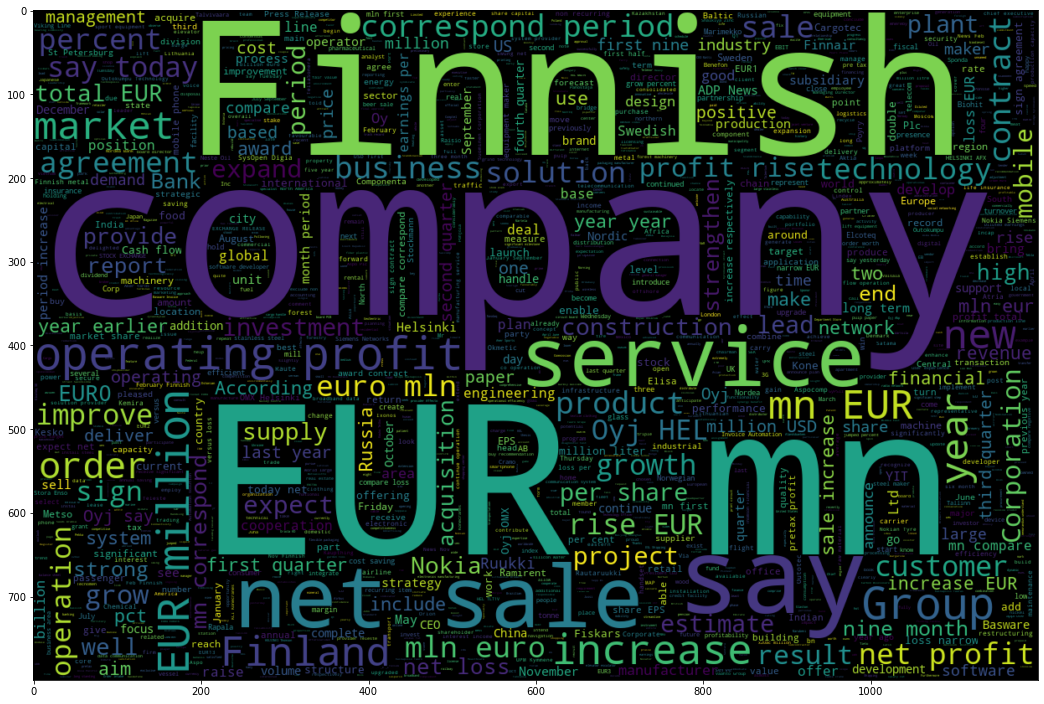

In [12]:
plt.figure(figsize = (18,24)) # Text Reviews with positive Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(pos))
plt.imshow(wordcloud,interpolation = 'bilinear')

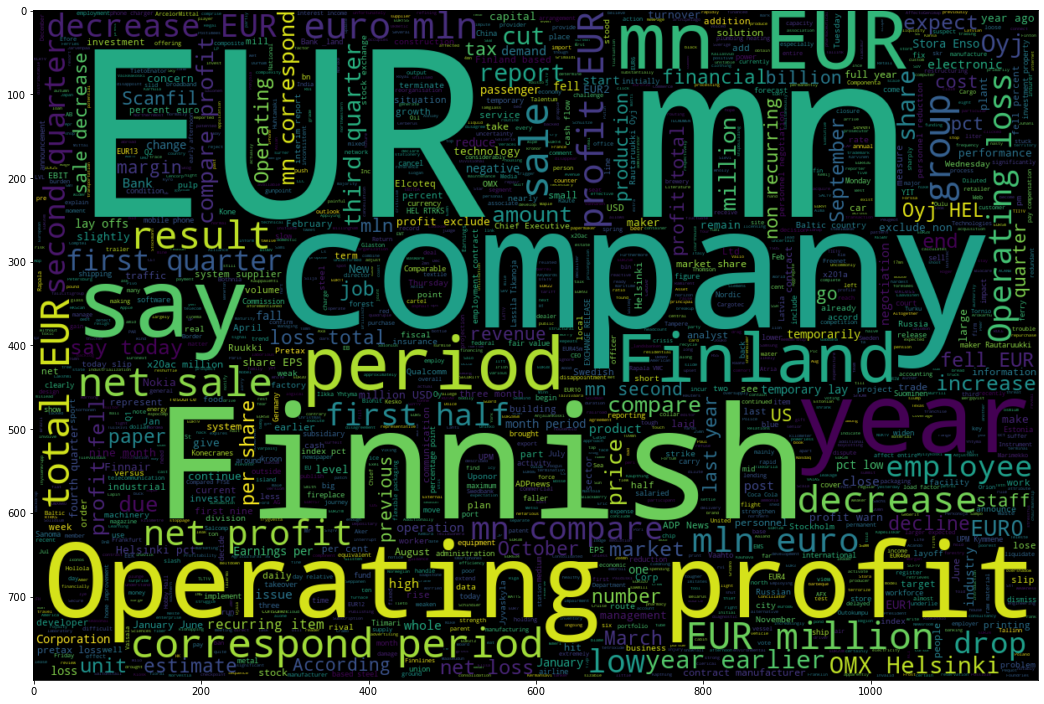

In [13]:
plt.figure(figsize = (18,24)) # Text Reviews with negative Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(neg))
plt.imshow(wordcloud,interpolation = 'bilinear')

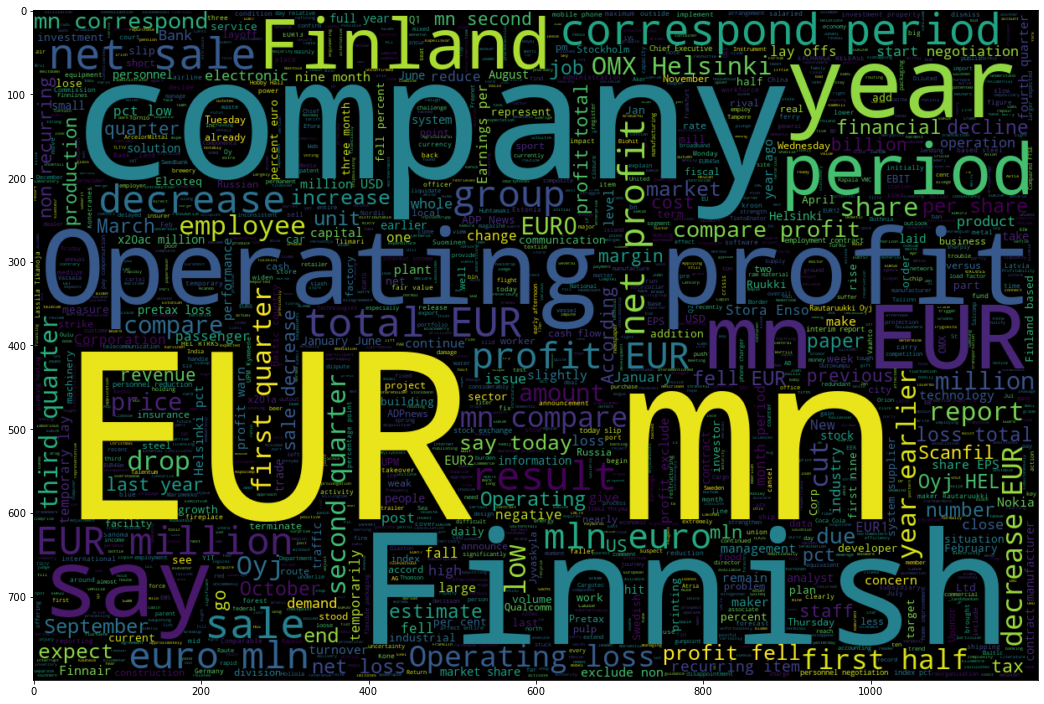

In [14]:
plt.figure(figsize = (18,24)) # Text Reviews with neutral Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(neutral))
plt.imshow(wordcloud,interpolation = 'bilinear')

From above plots we can see few words like company and EUR are common to all three sentiments so we should remove these from our texts as they dont provide any information.

In [15]:
# creating a variable for count vectorizer which gives us features using the whole text of data.
count_vec = CountVectorizer(max_features=4000, ngram_range=(1,2), max_df=0.9, min_df=0)
# max_df insures to remove most frequent words as we discussed earlier.
# ngram_range is used to select words at a time like 1 or 2 like if a sentence have 'not happy' in text then it can mean two things if we pick the word 'happy' and pick the words 'not happy' both.

In [16]:
x_train_features = count_vec.fit_transform(x_train).todense()
x_test_features = count_vec.transform(x_test).todense()
x_train_features.shape, x_test_features.shape

((3876, 4000), (970, 4000))

# **Predictions**

**1. Multinomial NaiveBayes**

In [17]:
nb_clf = MultinomialNB()
nb_clf.fit(x_train_features, y_train)
y_pred = nb_clf.predict(x_test_features)
print(accuracy_score(y_test,y_pred)*100)

71.1340206185567


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.52      0.54      0.53       128
     neutral       0.76      0.87      0.81       575
    positive       0.66      0.46      0.54       267

    accuracy                           0.71       970
   macro avg       0.65      0.62      0.63       970
weighted avg       0.70      0.71      0.70       970



**2. Logistic Regression**

In [19]:
lr = LogisticRegression()
lr.fit(x_train_features, y_train)
y_pred = lr.predict(x_test_features)
print(accuracy_score(y_test,y_pred)*100)

75.6701030927835


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.70      0.52      0.59       128
     neutral       0.78      0.88      0.83       575
    positive       0.70      0.60      0.65       267

    accuracy                           0.76       970
   macro avg       0.73      0.67      0.69       970
weighted avg       0.75      0.76      0.75       970



**3. Simple Vector Machines**

In [21]:
svc = SVC()
svc.fit(x_train_features, y_train)
y_pred = svc.predict(x_test_features)
print(accuracy_score(y_test,y_pred)*100)

72.78350515463917


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.80      0.26      0.39       128
     neutral       0.72      0.97      0.82       575
    positive       0.77      0.42      0.55       267

    accuracy                           0.73       970
   macro avg       0.76      0.55      0.59       970
weighted avg       0.74      0.73      0.69       970



**4. Neural Network with Keras**

In [23]:
y_train[y_train=='positive']=2
y_train[y_train=='neutral']=1
y_train[y_train=='negative']=0
y_test[y_test=='positive']=2
y_test[y_test=='neutral']=1
y_test[y_test=='negative']=0

encoder = OneHotEncoder()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((3876, 3), (970, 3))

In [24]:
# Function to fit our model and plot accuracy curves for train and test data.
def fit_model(optimizer):
    model = Sequential()
    
    model.add(Dense(units=512, activation='relu', input_dim=x_train_features.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    history = model.fit(x_train_features, y_train, validation_data=(x_test_features, y_test), epochs=100, verbose=0)
    
    print('Accuracy with',optimizer,'optimizer is :',model.evaluate(x_test_features, y_test)[1]*100)
    
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.title('opt='+optimizer)

970/970 [==============================] - 0s 111us/step
Accuracy with sgd optimizer is : 74.84536170959473
970/970 [==============================] - 0s 117us/step
Accuracy with rmsprop optimizer is : 73.50515723228455
970/970 [==============================] - 0s 124us/step
Accuracy with adagrad optimizer is : 74.74226951599121
970/970 [==============================] - 0s 104us/step
Accuracy with adam optimizer is : 74.53608512878418


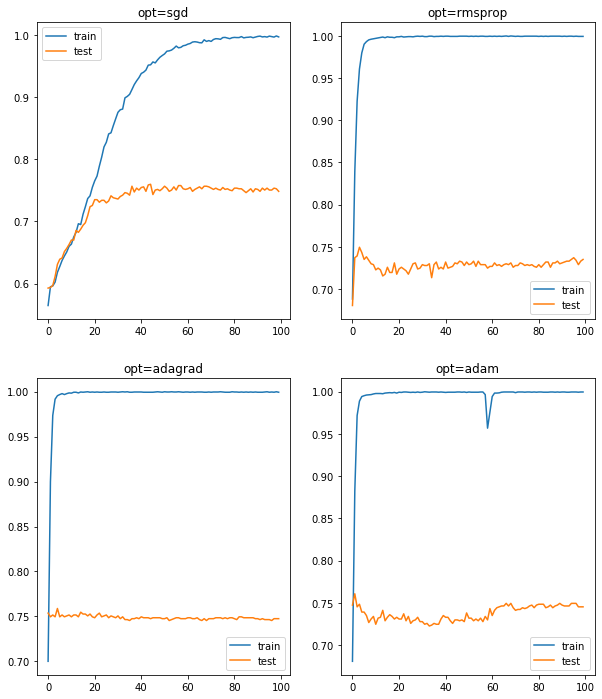

In [25]:
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']
plt.figure(figsize=(10,12))
for i in range(len(optimizers)):
    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for an optimizer
    fit_model(optimizers[i])
# show learning curves
plt.show()

1. **As we can see we are getting around 76% accuracy.**
2. **I think that's a decent accuracy as we dont have enough data to train our model on.**

# **Comment below if you dont understand anything. If you like the notebook please upvote and any kind of suggestions is much appreciated :) **